In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.style.use('ggplot')

from sklearn.metrics.cluster import homogeneity_score

In [2]:
df = pd.read_csv('Proveindustriales_Data_Cleaned_numeric_onehot_csv.csv')

In [3]:
df.head(2)

,CATEGORÍA_Alimentos y Bebidas,CATEGORÍA_Almacenamiento y empaques,"CATEGORÍA_Aseo, Cafetería y Oficina",CATEGORÍA_Construcción y Mantenimiento,CATEGORÍA_Dotación y elementos de protección personal,CATEGORÍA_Logística y transporte,CATEGORÍA_Moda y accesorios,CATEGORÍA_Otros,CATEGORÍA_Químicos y derivados,CATEGORÍA_Vehículos y repuestos,...,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_+_IVA,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.011488,8.570006e-07,0.000029,0.000029,0.009998,0.009998,0.0,0.999834,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.113017,5.621736e-06,0.000028,0.000000,0.098380,0.098380,0.0,0.983804,0.0,0.000011


In [4]:
df =df.loc[:, df.columns != 'FECHA_ÚLTIMO_MOVIMIENTO']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 62 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   CATEGORÍA_Alimentos y Bebidas                          499 non-null    float64
 1   CATEGORÍA_Almacenamiento y empaques                    499 non-null    float64
 2   CATEGORÍA_Aseo, Cafetería y Oficina                    499 non-null    float64
 3   CATEGORÍA_Construcción y Mantenimiento                 499 non-null    float64
 4   CATEGORÍA_Dotación y elementos de protección personal  499 non-null    float64
 5   CATEGORÍA_Logística y transporte                       499 non-null    float64
 6   CATEGORÍA_Moda y accesorios                            499 non-null    float64
 7   CATEGORÍA_Otros                                        499 non-null    float64
 8   CATEGORÍA_Químicos y derivados                    

In [6]:
df.head(3)

,CATEGORÍA_Alimentos y Bebidas,CATEGORÍA_Almacenamiento y empaques,"CATEGORÍA_Aseo, Cafetería y Oficina",CATEGORÍA_Construcción y Mantenimiento,CATEGORÍA_Dotación y elementos de protección personal,CATEGORÍA_Logística y transporte,CATEGORÍA_Moda y accesorios,CATEGORÍA_Otros,CATEGORÍA_Químicos y derivados,CATEGORÍA_Vehículos y repuestos,...,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_+_IVA,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.011488,8.570006e-07,0.000029,0.000029,0.009998,0.009998,0.0,0.999834,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.113017,5.621736e-06,0.000028,0.000000,0.098380,0.098380,0.0,0.983804,0.0,0.000011
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.225206,1.120231e-05,0.000022,0.000000,0.229647,0.229647,0.0,0.918589,0.0,0.000022


# CLUSTERING

In [7]:
from sklearn import metrics
from sklearn.cluster import KMeans

## ELBOW METHOD

In [8]:
wcss = []
for i in range (1, 18):
    kmeans = KMeans(n_clusters=i, max_iter=200)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'Clustering score')

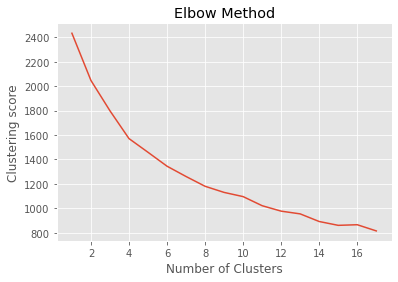

In [9]:
plt.plot(range(1,18), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering score')

As we have seen the optimal n_cluster =4

## CREATE THE CLUSTER WITH OPTIMAL N_CLUSTER

In [10]:
clustering = KMeans(n_clusters=4, max_iter=300)
clustering.fit(df)

KMeans(n_clusters=4)

In [11]:
df_scaled = df[3:4]
df_scaled

,CATEGORÍA_Alimentos y Bebidas,CATEGORÍA_Almacenamiento y empaques,"CATEGORÍA_Aseo, Cafetería y Oficina",CATEGORÍA_Construcción y Mantenimiento,CATEGORÍA_Dotación y elementos de protección personal,CATEGORÍA_Logística y transporte,CATEGORÍA_Moda y accesorios,CATEGORÍA_Otros,CATEGORÍA_Químicos y derivados,CATEGORÍA_Vehículos y repuestos,...,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_+_IVA,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.215863,0.000005,0.000027,0.000027,0.187913,0.187913,0.0,0.939564,0.0,0.0


In [12]:
# df['KMeans_Cluster'] = clustering.labels_
df.head()

,CATEGORÍA_Alimentos y Bebidas,CATEGORÍA_Almacenamiento y empaques,"CATEGORÍA_Aseo, Cafetería y Oficina",CATEGORÍA_Construcción y Mantenimiento,CATEGORÍA_Dotación y elementos de protección personal,CATEGORÍA_Logística y transporte,CATEGORÍA_Moda y accesorios,CATEGORÍA_Otros,CATEGORÍA_Químicos y derivados,CATEGORÍA_Vehículos y repuestos,...,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_+_IVA,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.011488,8.570006e-07,0.000029,0.000029,0.009998,0.009998,0.000000,0.999834,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.113017,5.621736e-06,0.000028,0.000000,0.098380,0.098380,0.000000,0.983804,0.0,0.000011
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.225206,1.120231e-05,0.000022,0.000000,0.229647,0.229647,0.000000,0.918589,0.0,0.000022
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.215863,5.368937e-06,0.000027,0.000027,0.187913,0.187913,0.000000,0.939564,0.0,0.000000
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.006757,6.267798e-06,0.000013,0.000013,0.350997,0.417686,0.066689,0.835372,0.0,0.000000


## CLUSTER CENTERS

Data Frame of 4 clusters with normalized data

In [13]:
df_centroids = pd.DataFrame(clustering.cluster_centers_, columns=df.columns)
df_centroids

,CATEGORÍA_Alimentos y Bebidas,CATEGORÍA_Almacenamiento y empaques,"CATEGORÍA_Aseo, Cafetería y Oficina",CATEGORÍA_Construcción y Mantenimiento,CATEGORÍA_Dotación y elementos de protección personal,CATEGORÍA_Logística y transporte,CATEGORÍA_Moda y accesorios,CATEGORÍA_Otros,CATEGORÍA_Químicos y derivados,CATEGORÍA_Vehículos y repuestos,...,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_+_IVA,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN
0,5.138889e-01,3.469447e-17,1.111111e-01,1.387779e-17,-1.387779e-17,2.083333e-02,5.551115e-17,0.118056,1.110223e-16,2.361111e-01,...,0.591954,0.019167,0.000792,0.000274,0.191328,0.201420,0.010092,0.429760,0.000841,0.033596
1,2.439024e-02,1.626016e-02,7.235772e-01,-3.469447e-18,8.130081e-02,9.756098e-02,2.775558e-17,0.048780,4.163336e-17,8.130081e-03,...,0.853428,0.000505,0.000047,0.000034,0.180390,0.193261,0.012872,0.289099,0.000035,0.000132
2,2.631579e-02,3.157895e-01,-5.551115e-16,1.734723e-17,-1.387779e-17,1.315789e-02,5.551115e-17,0.013158,5.789474e-01,2.775558e-17,...,0.100564,0.000052,0.000102,0.000091,0.038796,0.044853,0.006057,0.920786,0.000003,0.000008
3,-1.387779e-16,-6.245005e-17,3.589744e-01,5.769231e-02,1.387779e-17,-2.081668e-17,4.487179e-01,0.089744,1.526557e-16,0.000000e+00,...,0.150797,0.004081,0.000414,0.000153,0.355868,0.423494,0.067626,0.687731,0.000496,0.000733


# DF WITH LABELS OF CLUSTER

In [14]:
df['KMeans_Cluster'] = clustering.labels_
df.sample(n=7)

,CATEGORÍA_Alimentos y Bebidas,CATEGORÍA_Almacenamiento y empaques,"CATEGORÍA_Aseo, Cafetería y Oficina",CATEGORÍA_Construcción y Mantenimiento,CATEGORÍA_Dotación y elementos de protección personal,CATEGORÍA_Logística y transporte,CATEGORÍA_Moda y accesorios,CATEGORÍA_Otros,CATEGORÍA_Químicos y derivados,CATEGORÍA_Vehículos y repuestos,...,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_+_IVA,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN,KMeans_Cluster
42,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.067097e-03,0.000021,0.000021,0.190846,0.190846,0.000000,0.190846,0.000021,0.000000,1
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.450093e-06,0.000107,0.000107,0.000494,0.000588,0.000094,0.999997,0.000000,0.000000,2
381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,7.078493e-02,0.009652,0.000000,0.000000,0.000000,0.000000,0.000000,0.006465,0.000000,0
465,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.754378e-04,0.000020,0.000000,0.184937,0.184937,0.000000,0.184937,0.000000,0.000481,1
124,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.989259e-07,0.000147,0.000147,0.001025,0.001219,0.000195,0.999976,0.000000,0.000000,2
199,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.534766e-04,0.000010,0.000010,0.109626,0.109626,0.000000,0.986635,0.000000,0.000000,0
424,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.889389e-06,0.000025,0.000000,0.059760,0.071115,0.011355,0.995612,0.000004,0.000011,3


In [16]:
df_original = pd.read_excel('Proveindustriales_completo.xlsx')

In [20]:
df_original['KMeans_Cluster'] = clustering.labels_
df_original_plus_clusters = df_original
df_original.sample(n=7)

,NÚMERO_PEDIDO,ORDEN_NÚMERO,CATEGORÍA,SUBCATEGORÍA,PROVEEDOR,PRESUPUESTO,COMPAÑÍA_COMPRADORA,ESTADO,PRODUCTO_O_SERVICIO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_+_IVA,FECHA_ÚLTIMO_MOVIMIENTO,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN,KMeans_Cluster
478,46664,10,"Aseo, Cafetería y Oficina",Elementos de aseo y limpieza,KIPCLIN S.A.S.,Presupuesto Covid marzo,Proveindustriales BPO S.A.S.,Recibido,Tapabocas Médicos 3 Capas Termosellados X 50,1.0,1,22000,22000,0,22000,2021-04-07,6.000000,0.000000,1
227,40236,121,"Aseo, Cafetería y Oficina",Elementos de papelería,Suministros ABC,Otros,PORTAL PRUEBAS,Finalizado Incompleto,Grapadora,1.0,0,33613,40000,6387,40000,2020-06-03,3.000000,0.000000,3
343,619,38,Vehículos y repuestos,Vehículos de motor,Proveedor 1K,Otros,PORTAL PRUEBAS,Orden en Proceso,Batería de vehículo,2.0,0,0,0,0,0,2018-09-19,2.009202,0.000000,0
254,1613,99,Alimentos y Bebidas,Bebidas,Proveedor 1K,Presupuesto 2020,PORTAL PRUEBAS,Orden en Proceso,Botella de Agua,1.0,0,1000,1000,0,1000,2020-01-18,3.000000,0.000000,0
423,62,6,Vigilancia y seguridad industrial,Otros,Suministros ABC,Otros,PORTAL PRUEBAS,Orden en Proceso,Tapabocas,3.0,0,84,100,16,300,2018-05-16,2.009202,0.000000,3
243,40189,109,Alimentos y Bebidas,Bebidas,Proveedor 1K,Presupuesto 2020,PORTAL PRUEBAS,Orden Rechazada,Botella de Agua,1.0,0,1000,1000,0,1000,2020-07-02,0.000000,24.467742,0
9,47530,8,"Aseo, Cafetería y Oficina",Elementos de aseo y limpieza,KIPCLIN S.A.S.,Presupuesto Santiago,CONTACTO ARQUITECTURA S.A.S.,Orden Rechazada,Otros,1.0,0,2100,2100,0,2100,2021-06-24,0.000000,24.467742,1


In [21]:
df_original_plus_clusters.to_excel('Proveindustriales_completo_y_clusters.xlsx', index=False)

## DESCRIPTION OF THE CLUSTERS

In [83]:
pd.options.display.max_columns = None
pd.options.display.float_format = '{:20,.2f}'.format

In [84]:
df.groupby('KMeans_Cluster').sum()

,CATEGORÍA_Alimentos y Bebidas,CATEGORÍA_Almacenamiento y empaques,"CATEGORÍA_Aseo, Cafetería y Oficina",CATEGORÍA_Construcción y Mantenimiento,CATEGORÍA_Dotación y elementos de protección personal,CATEGORÍA_Logística y transporte,CATEGORÍA_Moda y accesorios,CATEGORÍA_Otros,CATEGORÍA_Químicos y derivados,CATEGORÍA_Vehículos y repuestos,CATEGORÍA_Vigilancia y seguridad industrial,SUBCATEGORÍA_Bebidas,SUBCATEGORÍA_Calzado,SUBCATEGORÍA_Elementos de aseo y limpieza,SUBCATEGORÍA_Elementos de papelería,SUBCATEGORÍA_Otros,SUBCATEGORÍA_Resinas y derivados,SUBCATEGORÍA_Seguridad y protección personal,SUBCATEGORÍA_Suministros de embalaje,SUBCATEGORÍA_Transporte de correo y carga,SUBCATEGORÍA_Vegetales frescos,SUBCATEGORÍA_Vehículos de motor,PROVEEDOR_KIPCLIN S.A.S.,PROVEEDOR_MUNDITONNER S.A.S,PROVEEDOR_Otros,PROVEEDOR_PLASTICOS Y PIGMENTOS,PROVEEDOR_Proveedor 1K,PROVEEDOR_Suministros ABC,PRESUPUESTO_DICIEMBRE 2019 MATERIAS PRIMAS,PRESUPUESTO_ENERO 2020 MATERIAS PRIMAS,PRESUPUESTO_Mercadeo,PRESUPUESTO_NOVIEMBRE 2019 MATERIAS PRIMAS,PRESUPUESTO_Otros,PRESUPUESTO_Presupuesto 2020,PRESUPUESTO_Presupuesto Covid Julio,PRESUPUESTO_Presupuesto Covid marzo,PRESUPUESTO_Presupuesto Mayo 2018,PRESUPUESTO_Presupuesto Santiago,PRESUPUESTO_Presupuesto Santiago 2020,COMPAÑÍA_COMPRADORA_CONTACTO ARQUITECTURA S.A.S.,COMPAÑÍA_COMPRADORA_Otros,COMPAÑÍA_COMPRADORA_PLASTISOL SAS,COMPAÑÍA_COMPRADORA_PORTAL PRUEBAS,COMPAÑÍA_COMPRADORA_Proveindustriales BPO S.A.S.,ESTADO_Cancelado,ESTADO_Enviado,ESTADO_Finalizado Incompleto,ESTADO_Orden Rechazada,ESTADO_Orden en Proceso,ESTADO_Pendiente por Aprobar,ESTADO_Recibido,ESTADO_Recibido Parcial,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_+_IVA,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN
KMeans_Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,74.00,0.00,16.00,0.00,0.00,3.00,0.00,17.00,0.00,34.00,0.00,33.00,0.00,16.00,0.00,31.00,0.00,0.00,0.00,3.00,27.00,34.00,0.00,0.00,12.00,0.00,132.00,0.00,0.00,0.00,17.00,0.00,42.00,10.00,0.00,0.00,0.00,67.00,8.00,0.00,0.00,0.00,144.00,0.00,3.00,0.00,11.00,8.00,76.00,9.00,29.00,8.00,85.24,2.76,0.11,0.04,27.55,29.00,1.45,61.89,0.12,4.84
1,0.00,0.00,56.00,9.00,0.00,0.00,70.00,15.00,0.00,0.00,7.00,0.00,59.00,0.00,56.00,35.00,0.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,156.00,0.00,0.00,14.00,0.00,66.00,12.00,0.00,0.00,17.00,33.00,15.00,0.00,0.00,0.00,157.00,0.00,0.00,1.00,3.00,13.00,95.00,0.00,43.00,2.00,23.54,0.64,0.06,0.02,55.68,66.26,10.58,108.25,0.08,0.11
2,3.00,2.00,89.00,0.00,10.00,12.00,0.00,6.00,0.00,1.00,0.00,1.00,0.00,66.00,19.00,23.00,0.00,0.00,1.00,12.00,0.00,1.00,60.00,21.00,42.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,15.00,16.00,0.00,86.00,0.00,33.00,2.00,21.00,7.00,60.00,5.00,0.00,1.00,31.00,4.00,0.00,82.00,0.00,104.97,0.06,0.01,0.00,22.19,23.77,1.58,35.56,0.00,0.02
3,2.00,24.00,0.00,0.00,0.00,1.00,0.00,0.00,44.00,0.00,4.00,0.00,0.00,0.00,0.00,16.00,44.00,4.00,11.00,0.00,0.00,0.00,0.00,0.00,46.00,29.00,0.00,0.00,21.00,28.00,0.00,14.00,11.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,68.00,1.00,0.00,2.00,0.00,1.00,2.00,4.00,0.00,63.00,3.00,7.62,0.00,0.01,0.01,2.79,3.22,0.43,69.01,0.00,0.00


## METRICS

## PCA TO TAKE A LOOK OF THE CLUSTER

In [85]:
from sklearn.decomposition import  PCA

In [86]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df)
pca_df = pd.DataFrame(data=pca_fit, columns=['Component_1', 'Component_2'])
pca_nombres = pd.concat([pca_df, df[['KMeans_Cluster']]], axis=1)

pca_nombres

,Component_1,Component_2,KMeans_Cluster
0,1.87,-0.67,3
1,1.65,-0.62,3
2,1.63,-0.57,3
3,1.84,-0.60,3
4,1.68,-0.64,3
...,...,...,...
494,1.09,-0.05,2
495,1.09,-0.05,2
496,1.09,-0.05,2
497,1.09,-0.05,2


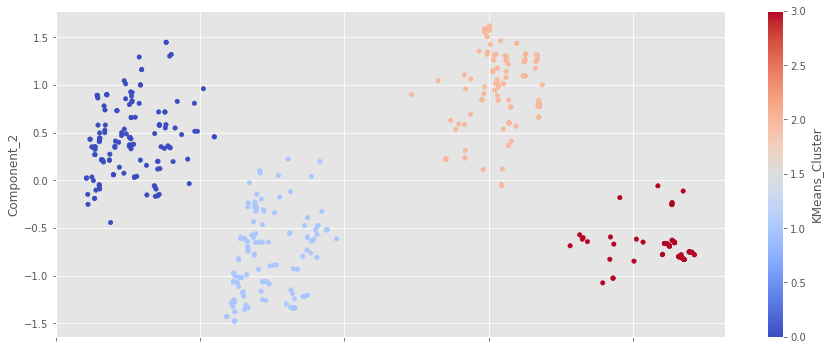

In [87]:
pca_nombres.plot.scatter(x='Component_1', y='Component_2', c='KMeans_Cluster',cmap='coolwarm', figsize=(15, 6))

In [88]:
px.scatter(pca_nombres, x="Component_1", y="Component_2", color="KMeans_Cluster", color_continuous_scale=px.colors.sequential.Viridis)